In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
# convert categorical data to numerical data
df['default'].replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)
df['job'].replace(to_replace=['management', 'blue-collar','technician','admin.','services','retired','self-employed',
                                 'student','unemployed','entrepreneur','housemaid','unknown'], value=[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df['marital'].replace(to_replace=['married', 'single','divorced'], value=[1,2,0], inplace=True)
df['education'].replace(to_replace=['secondary', 'tertiary','primary','unknown'], value=[1,2,3,4], inplace=True)
df['housing'].replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)
df['loan'].replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)
df['contact'].replace(to_replace=['cellular', 'unknown', 'telephone'], value=[1,2,3], inplace=True)
df['month'].replace(to_replace=['may', 'aug', 'jul', 'jun', 'nov', 'apr', 'feb', 'oct', 'jan', 'sep', 'mar', 'dec']
                    , value=[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df['poutcome'].replace(to_replace=['unknown', 'failure','success','other'], value=[1,2,3,4], inplace=True)
df['deposit'].replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)

In [5]:
pd.set_option('display.max_rows', 10)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,4,1,1,0,2343,1,0,2,5,1,1042,1,-1,0,1,1
1,56,4,1,1,0,45,0,0,2,5,1,1467,1,-1,0,1,1
2,41,3,1,1,0,1270,1,0,2,5,1,1389,1,-1,0,1,1
3,55,5,1,1,0,2476,1,0,2,5,1,579,1,-1,0,1,1
4,54,4,1,2,0,184,0,0,2,5,1,673,2,-1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,2,3,0,1,1,0,1,20,6,257,1,-1,0,1,0
11158,39,5,1,1,0,733,0,0,2,16,4,83,4,-1,0,1,0
11159,32,3,2,1,0,29,0,0,1,19,2,156,2,-1,0,1,0
11160,43,3,1,1,0,0,0,1,1,8,1,9,2,172,5,2,0


In [6]:
X = df[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays',
       'previous','poutcome']]
y = df['deposit']

In [7]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=30)

In [8]:
print("shape of X_trainset is : {} and shape of y_trainset is : {}".format(X_trainset.shape, y_trainset.shape))
print("shape of X_trainset is : {} and shape of y_trainset is : {}".format(X_testset.shape, y_testset.shape))

shape of X_trainset is : (8929, 16) and shape of y_trainset is : (8929,)
shape of X_trainset is : (2233, 16) and shape of y_trainset is : (2233,)


In [9]:
max_depth = 10
for i in range(3,max_depth):
    dt = DecisionTreeClassifier(random_state=1, max_depth=i)
    dt.fit(X_trainset, y_trainset)
    dt_score_train = dt.score(X_trainset, y_trainset)
    print("depth = {}".format(i))
    print("Training score: ",dt_score_train)
    dt_score_test = dt.score(X_testset, y_testset)
    print("Testing score: ",dt_score_test)
    print("--------------------------------------------")

depth = 3
Training score:  0.7761227461081868
Testing score:  0.7711598746081505
--------------------------------------------
depth = 4
Training score:  0.7993056333296001
Testing score:  0.7931034482758621
--------------------------------------------
depth = 5
Training score:  0.8066972785306306
Testing score:  0.8007165248544559
--------------------------------------------
depth = 6
Training score:  0.8277522678911412
Testing score:  0.8114643976712942
--------------------------------------------
depth = 7
Training score:  0.8454474185239108
Testing score:  0.8119122257053292
--------------------------------------------
depth = 8
Training score:  0.8661664240116475
Testing score:  0.8280340349305867
--------------------------------------------
depth = 9
Training score:  0.8826296337775786
Testing score:  0.8172861621137483
--------------------------------------------


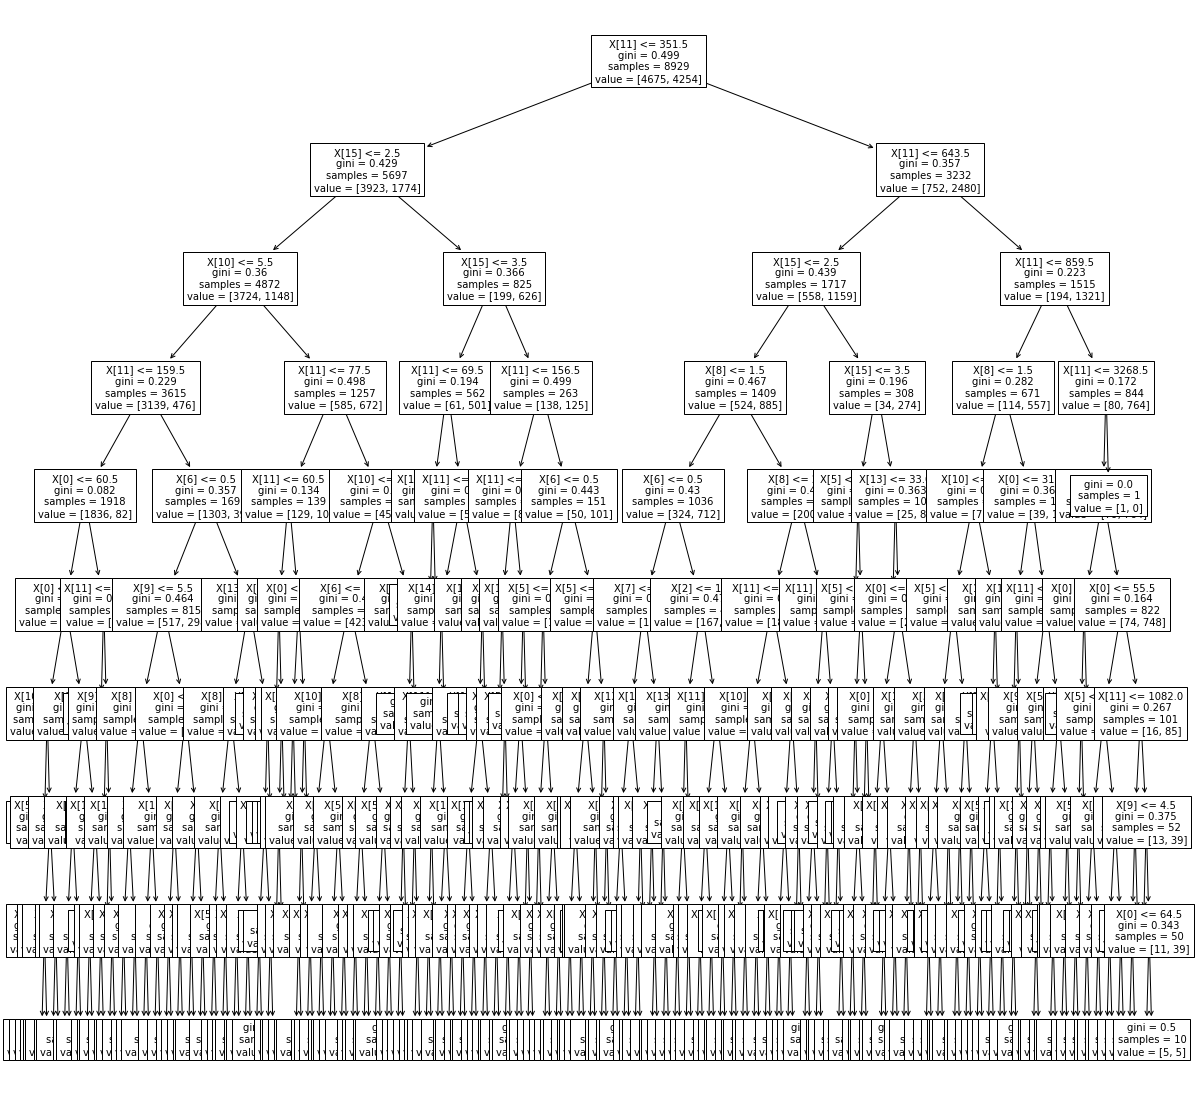

In [10]:
# visualising tree
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dt, fontsize=10)
plt.show()